<a href="https://colab.research.google.com/github/OmarHisham98/Speech-emotion-Recognition/blob/main/assignment_3_speech_emotion_recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Download the Dataset and Understand the Format (10 Points)**





# Loading and playing audio

In [ ]:
#This cell is responsible for connecting the notebook with my google drive to access the dataset
from google.colab import drive
# drive.mount('/content/drive')

def mount():
  drive.flush_and_unmount()
  drive.mount('/content/drive')


**A.We will use CREMA dataset that is available at the following link:**

Loading audio function

In [ ]:
#starting here
import librosa
import librosa.display
import numpy as np
import librosa
import librosa.display
import os 
import pandas as pd
import numpy as np

mount()
path = '/content/drive/MyDrive/Crema'

crema_directory = os.listdir(path)
# crema_directory = crema_directory[:1000]
crema_directory = sorted(crema_directory,key=lambda x: str(os.path.splitext(x)[0])) 
file_labels = []
file_path = []
file_data = []
file_size = []

def readAudioFile(crema_directory):

  max = 0
  print()
  for audio_name in crema_directory:
    
    #print(os.path.splitext(audio_name)[0])
    data, sample_rate = librosa.load(path+"/"+ audio_name)
    file_data.append(data)
    file_size.append(np.shape(data))
    print(audio_name)

    if max < np.shape(data)[0]:
        max = np.shape(data)[0]
    

    nameSplit=audio_name.split('_')

    if nameSplit[2] == 'SAD':
        file_labels.append('sad')



    elif nameSplit[2] == 'ANG':
        file_labels.append('angry')

    elif nameSplit[2] == 'DIS':
        file_labels.append('disgust')

    elif nameSplit[2] == 'FEA':
        file_labels.append('fear')

    elif nameSplit[2] == 'HAP':
        file_labels.append('happy') 

    elif nameSplit[2] == 'NEU':
        file_labels.append('neutral')

  return max




Mounted at /content/drive


Crema:

The third component is responsible for the emotion label Meaning:
**"1001_DFA_ANG_XX.wav"** the third component in the name we have is the **"ANG"** and it's treated as the label of the audio file and in that case the **"Angry Emotion"**.

In [ ]:
import librosa
import librosa.display
import os 
import pandas as pd
import numpy as np
 

max = readAudioFile(crema_directory)
print(file_labels)
print(max)

# # dataframe for emotion of files
# emotion_df = pd.DataFrame(file_labels, columns=['Emotions'])
# # dataframe for path of files.
# path_df = pd.DataFrame(file_path, columns=['Path'])

# crema_df = pd.concat([emotion_df, path_df], axis=1)
# display(crema_df)

Streaming output truncated to the last 5000 lines.
1031_DFA_HAP_XX.wav
1031_DFA_NEU_XX.wav
1031_DFA_SAD_XX.wav
1031_IEO_ANG_HI.wav
1031_IEO_ANG_LO.wav
1031_IEO_ANG_MD.wav
1031_IEO_DIS_HI.wav
1031_IEO_DIS_LO.wav
1031_IEO_DIS_MD.wav
1031_IEO_FEA_HI.wav
1031_IEO_FEA_LO.wav
1031_IEO_FEA_MD.wav
1031_IEO_HAP_HI.wav
1031_IEO_HAP_LO.wav
1031_IEO_HAP_MD.wav
1031_IEO_NEU_XX.wav
1031_IEO_SAD_HI.wav
1031_IEO_SAD_LO.wav
1031_IEO_SAD_MD.wav
1031_IOM_ANG_XX.wav
1031_IOM_DIS_XX.wav
1031_IOM_FEA_XX.wav
1031_IOM_HAP_XX.wav
1031_IOM_NEU_XX.wav
1031_IOM_SAD_XX.wav
1031_ITH_ANG_XX.wav
1031_ITH_DIS_XX.wav
1031_ITH_FEA_XX.wav
1031_ITH_HAP_XX.wav
1031_ITH_NEU_XX.wav
1031_ITH_SAD_XX.wav
1031_ITS_ANG_XX.wav
1031_ITS_DIS_XX.wav
1031_ITS_FEA_XX.wav
1031_ITS_HAP_XX.wav
1031_ITS_NEU_XX.wav
1031_ITS_SAD_XX.wav
1031_IWL_ANG_XX.wav
1031_IWL_DIS_XX.wav
1031_IWL_FEA_XX.wav
1031_IWL_HAP_XX.wav
1031_IWL_NEU_XX.wav
1031_IWL_SAD_XX.wav
1031_IWW_ANG_XX.wav
1031_IWW_DIS_XX.wav
1031_IWW_FEA_XX.wav
1031_IWW_HAP_XX.wav
1031_IWW_

In [ ]:
# df1 = cvcrema_df[crema_df['Emotions'].str.contains("happy")]
# print(df1)
# df2 = crema_df[crema_df['Emotions'].str.contains("angry")]
# print(df2)
# df3 = crema_df[crema_df['Emotions'].str.contains("disgust")]
# print(df3)
# df4 = crema_df[crema_df['Emotions'].str.contains("fearful")]
# print(df4)
# df5 = crema_df[crema_df['Emotions'].str.contains("neutral")]
# print(df5)
# df6 = crema_df[crema_df['Emotions'].str.contains("sad")]
# print(df6)

# happy_emotion = pd.DataFrame(df1, columns=['Class 1'])
# angry_emotion = pd.DataFrame(df2, columns=['Class 2'])
# disgust_emotion = pd.DataFrame(df3, columns=['Class 3'])
# fearful_emotion = pd.DataFrame(df4, columns=['Class 4'])
# neutral_emotion = pd.DataFrame(df5, columns=['Class 5'])
# sad_emotion = pd.DataFrame(df6, columns=['Class 6'])

In [ ]:
import matplotlib.pyplot as plt
import IPython.display as ipd

def draw_play(audio_name):
  data, sample_rate = librosa.load(path+"/"+ audio_name , sr=None)
  fig, ax = plt.subplots(nrows=1, sharex = True)
  librosa.display.waveshow(data,sr=sample_rate)
  plt.show()
  return ipd.Audio(data,rate=sample_rate)



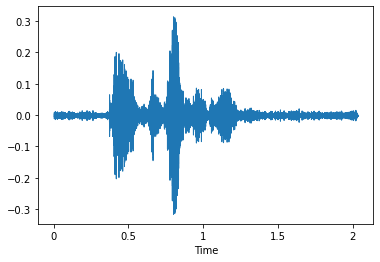

In [ ]:
draw_play(crema_directory[4])

Padding the data to the largest file size

In [ ]:
def padding(data,max):
  padded_data=[]
  for x in data:
    x = np.pad(x, (0, max-np.size(x)), 'constant')
    padded_data.append(x) 

  return padded_data

In [ ]:
padded_data=[]
padded_data = padding(file_data,max)
print(padded_data[0])
print(np.shape(padded_data))

[0. 0. 0. ... 0. 0. 0.]
(7442, 110361)


# FEATURE SPACE

In [ ]:
def zero_crossing(data):
  zcrs_list=[]
  for x in data:
    zcrs = librosa.feature.zero_crossing_rate(x + 0.0001)
    zcrs_list.append(zcrs)
  return zcrs_list


In [ ]:
zcrs = []
zcrs = zero_crossing(padded_data)
print(zcrs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
from math import pow
from sklearn.preprocessing import OneHotEncoder
def get_energy(data):
  energy_list=[]
  for x in data:
    rms = librosa.feature.rms(y = x, frame_length=2048, hop_length=512,center=True)
    energy_list.append(rms)
    # print(np.shape(rms))
  return energy_list 

In [ ]:
energy = []
energy = get_energy(padded_data)
energy=np.reshape(energy,(np.shape(energy)[0],np.shape(energy)[2],1))
print(np.shape(energy))

(7442, 216, 1)


Spectogram

In [ ]:
import cv2

def convert_spectogram(data):
  spectoList = []
  resizedList = []
  sum = 0
  count = 0
  for x in data:
    spectogram = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(spectogram))
    sum = sum + np.shape(Xdb)[1]
    count = count + 1 
    spectoList.append(Xdb)
    #plt.colorbar()

  for x in spectoList:
    x = cv2.resize(x,(64,64))
    x=np.transpose(x)
    resizedList.append(x)
    print(np.shape(x))
    # plt.figure(figsize=(14, 5))
    # librosa.display.specshow(x)
  return resizedList, round(sum/count)


In [ ]:
spectoList = []
average = 0
spectoList ,average = convert_spectogram(file_data)

print(np.shape(spectoList))
print(average)

Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
train_data=[]
test_data=[]
valid_data = []
# train_data,test_data,labelsTrain,labelsTest = train_test_split(padded_data,file_labels,test_size=0.3,train_size=0.7,random_state=42)
# train_data,valid_data,labelsTrain,labelsValid = train_test_split(train_data,labelsTrain,test_size=0.05,train_size=0.95,random_state=42)

train_data2D,test_data2D,labelsTrain2D,labelsTest2D = train_test_split(spectoList,file_labels,test_size=0.3,train_size=0.7,random_state=42)
train_data2D,valid_data2D,labelsTrain2D,labelsValid2D = train_test_split(train_data2D,labelsTrain2D,test_size=0.05,train_size=0.95,random_state=42)
print(np.shape(labelsTrain2D))



train_dataEnergy,test_dataEnergy,labelsTrainEnergy,labelsTestEnergy = train_test_split(energy,file_labels,test_size=0.3,train_size=0.7,random_state=42)
train_dataEnergy,valid_dataEnergy,labelsTrainEnergy,labelsValidEnergy = train_test_split(train_dataEnergy,labelsTrainEnergy,test_size=0.05,train_size=0.95,random_state=42)
print(np.shape(labelsTrainEnergy))

labelsTest2Energy=labelsTestEnergy
# encoder=LabelEncoder()
# labelsTrainEnergy=encoder.fit_transform(labelsTrainEnergy)
# labelsVaildEnergy=encoder.fit_transform(labelsValidEnergy)
# labelsTestEnergy=encoder.fit_transform(labelsTestEnergy)

encoder = OneHotEncoder()
labelsTrainEnergy = encoder.fit_transform(np.array(labelsTrainEnergy).reshape(-1,1)).toarray()
labelsTestEnergy=encoder.fit_transform(np.array(labelsTestEnergy).reshape(-1,1)).toarray()
labelsValidEnergy=encoder.fit_transform(np.array(labelsValidEnergy).reshape(-1,1)).toarray()
labelsTrain2D = encoder.fit_transform(np.array(labelsTrain2D).reshape(-1,1)).toarray()
labelsTest2D=encoder.fit_transform(np.array(labelsTest2D).reshape(-1,1)).toarray()
labelsValid2D=encoder.fit_transform(np.array(labelsValid2D).reshape(-1,1)).toarray()
print(np.shape(labelsTrainEnergy))



(4948,)
(4948,)
(4948, 6)


# CNN


In [ ]:
import numpy as np
import keras
from keras import models,layers
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Reshape,MaxPooling3D, MaxPool2D, MaxPooling1D
import math
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint




In [ ]:
train_path = train_data2D#'train'
valid_path = valid_data2D#'valid'
test_path = test_data2D#'test'

print(np.shape(train_path))
print(np.shape(valid_path))
print(np.shape(test_path))

(4948, 64, 64)
(261, 64, 64)
(2233, 64, 64)


In [ ]:
# train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['sad', 'angry','disgust','fear', 'happy' , 'neutral'], batch_size=10)
# valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['sad', 'angry','disgust','fear', 'happy' , 'neutral'], batch_size=4)
# test_batches  = ImageDataGenerator().flow_from_directory(test_path , target_size=(224,224), classes=['sad', 'angry','disgust','fear', 'happy' , 'neutral'], batch_size=10)

train_batches = []
valid_batches = []
test_batches = []
train_batch_number=10
valid_batch_number=10
splitedSize=10




#print(np.shape(train_path))
train_path=np.reshape(train_path,(np.shape(train_path)[0],np.shape(train_path)[1],np.shape(train_path)[2],1))
valid_path=np.reshape(valid_path,(np.shape(valid_path)[0],np.shape(valid_path)[1],np.shape(valid_path)[2],1))
test_path=np.reshape(test_path,(np.shape(test_path)[0],np.shape(test_path)[1],np.shape(test_path)[2],1))
train_dataEnergy=np.reshape(train_dataEnergy,(np.shape(train_dataEnergy)[0],np.shape(train_dataEnergy)[1],1))
test_dataEnergy=np.reshape(test_dataEnergy,(np.shape(test_dataEnergy)[0],np.shape(test_dataEnergy)[1],1))
valid_dataEnergy=np.reshape(valid_dataEnergy,(np.shape(valid_dataEnergy)[0],np.shape(valid_dataEnergy)[1],1))




# valid_label = to_categorical(labelsValid2D)





          

# test_train_batch_numbers = math.ceil(np.shape(test_path)[0]/10)
# test_batches = np.array_split(np.asarray(test_path),test_train_batch_numbers)
# test_batches = np.resize(test_batches,(test_train_batch_numbers,10,1025,average))
# print(np.shape(test_batches))

# print(train_batches)

# print(valid_batches)

# print(test_batches)



In [ ]:
def prepare_model_2D():  
  model2D=Sequential()
  model2D.add(Conv2D(256, kernel_size=(5,5), strides=1, padding='same', activation='relu',input_shape=(64, 64,1)))
  model2D.add(MaxPooling2D(pool_size=(5,5), strides = 2, padding = 'same'))

  model2D.add(Conv2D(256, kernel_size=(5,5), strides=1, padding='same', activation='relu'))
  model2D.add(MaxPooling2D(pool_size=(5,5), strides = 2, padding = 'same'))

  model2D.add(Conv2D(128, kernel_size=(5,5), strides=1, padding='same', activation='relu'))
  model2D.add(MaxPooling2D(pool_size=(5,5), strides = 2, padding = 'same'))
  model2D.add(Dropout(0.2))

  model2D.add(Conv2D(64, kernel_size=(5,5), strides=1, padding='same', activation='relu'))
  model2D.add(MaxPooling2D(pool_size=(5,5), strides = 2, padding = 'same'))

  model2D.add(Flatten())
  model2D.add(Dense(units=32, activation='relu'))
  model2D.add(Dropout(0.3))

  model2D.add(Dense(units=6, activation='softmax'))
  model2D.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
  return model2D

In [ ]:
def prepare_model_1D():
  model=Sequential()
  model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu',input_shape=(np.shape(train_dataEnergy)[1],1)))
  model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

  model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
  model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

  model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
  model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
  #model.add(Dropout(0.2))

  model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
  #model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

  model.add(Flatten())
  model.add(Dense(units=32, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(units=6, activation='softmax'))
  opt = keras.optimizers.Adam(learning_rate=0.0009)
  model.compile(optimizer = opt , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
  return model

In [ ]:
print(np.shape(train_path))
print(labelsTrainEnergy)
print(np.shape(labelsValidEnergy))
print(np.shape(labelsTrainEnergy))

(4948, 64, 64, 1)
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]
(261, 6)
(4948, 6)


In [ ]:
model=prepare_model_1D()
model.fit(train_dataEnergy,labelsTrainEnergy, validation_data=(valid_dataEnergy,labelsValidEnergy), epochs=100, verbose=2,batch_size=32)


Epoch 1/100
155/155 - 38s - loss: 1.5818 - accuracy: 0.3268 - val_loss: 1.4559 - val_accuracy: 0.4100
Epoch 2/100
155/155 - 37s - loss: 1.5024 - accuracy: 0.3812 - val_loss: 1.5151 - val_accuracy: 0.3678
Epoch 3/100
155/155 - 36s - loss: 1.4869 - accuracy: 0.3971 - val_loss: 1.4120 - val_accuracy: 0.4100
Epoch 4/100
155/155 - 36s - loss: 1.4670 - accuracy: 0.3953 - val_loss: 1.4155 - val_accuracy: 0.4253
Epoch 5/100
155/155 - 37s - loss: 1.4570 - accuracy: 0.4004 - val_loss: 1.3961 - val_accuracy: 0.4215
Epoch 6/100
155/155 - 37s - loss: 1.4501 - accuracy: 0.3981 - val_loss: 1.3888 - val_accuracy: 0.4330
Epoch 7/100
155/155 - 37s - loss: 1.4400 - accuracy: 0.4149 - val_loss: 1.3775 - val_accuracy: 0.4444
Epoch 8/100
155/155 - 36s - loss: 1.4339 - accuracy: 0.4192 - val_loss: 1.3526 - val_accuracy: 0.4368
Epoch 9/100
155/155 - 37s - loss: 1.4166 - accuracy: 0.4238 - val_loss: 1.3381 - val_accuracy: 0.4636
Epoch 10/100
155/155 - 37s - loss: 1.4046 - accuracy: 0.4321 - val_loss: 1.3409 - 

In [ ]:

# print(np.shape(labelsTrain2D))
# prepare_model_2D().fit(np.array(train_path),labelsTrain2D, validation_data=(valid_path,labelsValid2D), epochs=5, verbose=2,batch_size=5)

In [ ]:
# model2D.summary()


In [ ]:
predictions = model.predict(test_dataEnergy, steps=1, verbose=0)


In [ ]:
le = LabelEncoder()
labelsTest2Energy = le.fit_transform(labelsTest2Energy)
print(np.shape(predictions))

cm = confusion_matrix(test_dataEnergy.argmax(axis=1), predictions.argmax(axis=1))


(2233, 6)


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(30,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 2 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


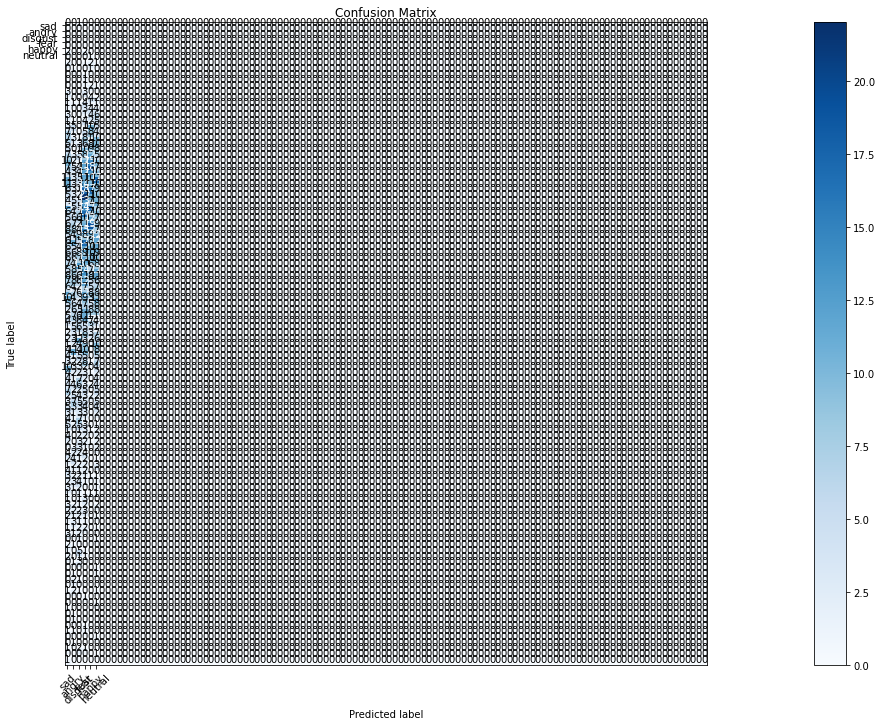

In [ ]:
cm_plot_labels = ['sad', 'angry','disgust','fear', 'happy' , 'neutral']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

F-Score

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

fScore = f1_score(test_dataEnergy.argmax(axis=1), predictions.argmax(axis=1), average='micro')
print(accuracy_score(test_dataEnergy.argmax(axis=1), predictions.argmax(axis=1)))
print(fScore)    
  